In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove6b100dtxt/glove.6B.100d.txt
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [124]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [125]:
len(df['ProductId'].value_counts())

74258

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [127]:
df1 = df.copy()
df1 = df1[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Summary', 'Text']]
df1.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [128]:
df1[df1['Score']<2][['Score', 'Summary']]

,Score,Summary
1,1,Not as Advertised
12,1,My Cats Are Not Fans of the New Food
26,1,Nasty No flavor
50,1,Don't like it
62,1,stale product.
...,...,...
568402,1,alternative sweetner
568426,1,rip off
568431,1,Mostly water
568432,1,No Good


<Axes: ylabel='count'>

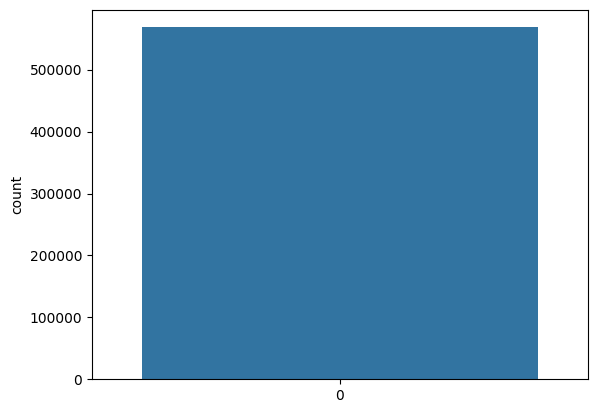

In [129]:
sns.countplot(df1['HelpfulnessNumerator'])

In [130]:
df1.isnull().sum()

HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Summary                   27
Text                       0
dtype: int64

In [131]:
df1.dropna(inplace=True)

In [132]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [133]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [134]:
stopwords_set = set(stopwords.words('english'))
print(stopwords_set)

{'on', 'that', "he'd", "should've", "they're", 'off', 'some', 'down', "we've", 'this', 'an', 'hers', "shouldn't", 'here', 'couldn', 'them', 'up', 'have', 'what', 'whom', 'more', "isn't", 'how', 'same', "that'll", 'not', 'those', 'during', "you're", 'does', "aren't", 'a', 'they', 'too', 'yourselves', "you've", "she's", 'very', "wasn't", 'did', 'me', 'your', 'such', "we'd", 'hadn', 'any', 'don', 'isn', 't', 'themselves', 'my', 'to', 'its', 'am', "i'd", 'under', 'o', 'is', 'myself', 'you', 'she', 'wasn', 'shan', 'of', "mightn't", 'where', 'm', 'we', "didn't", 'between', 'while', 'it', 'than', 'now', 'both', 'doesn', 'didn', "they'd", 'own', 'i', 'ain', "she'll", 'wouldn', "couldn't", 'had', 'most', 'for', 'by', 'further', 'from', 'below', 'herself', 'be', "needn't", 'other', 'itself', "they'll", 'ours', 'can', 'each', 'who', "i'm", "he's", 'her', "weren't", 'our', 'over', 'only', "mustn't", 'because', 'shouldn', 'aren', 'haven', 'so', 'then', 'nor', "she'd", 'but', 'been', "i'll", "shan't

In [135]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [136]:
ps = PorterStemmer()

In [137]:
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs before tokenization
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)

    # 3. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 4. Tokenize the text into words
    words = word_tokenize(text)

    # 5. Remove stopwords
    words = [word for word in words if word not in stopwords_set]

    # 6. Remove punctuation
    words = [word for word in words if word not in string.punctuation]

    # 7. Remove repeating characters (e.g., "soooon" -> "soon")
    words = [re.sub(r'(.)\1+', r'\1', word) for word in words]

    # 8. Apply stemming (e.g., "running" -> "run")
    words = [ps.stem(word) for word in words]
    text = ' '.join(words)
    return text

In [138]:
df1['Summary']=df1['Summary'].map(preprocess_text)
df1['Text']=df1['Text'].map(preprocess_text)

In [139]:
df1

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,god qualiti dog fod,bought sever vital cane dog fod product found ...
1,0,0,1,advertis,product ariv label jumbo salt peanut . peanut ...
2,1,1,4,` delight ' say,confect around centuri light pilowi citru gela...
3,3,3,2,cough medicin,loke secret ingredi robitusin believ found got...
4,0,0,5,great tafi,great tafi great price wide asort yumi tafi de...
...,...,...,...,...,...
568449,0,0,5,without,great sesam chicken.thi god beter restur eaten...
568450,0,0,2,disapoint,'m disapoint flavor chocol note especiali weak...
568451,2,2,5,perfect maltipo,star smal give one train sesion tri train dog ...
568452,1,1,5,favorit train reward treat,best treat train reward dog god grome lower ca...


In [140]:
df1['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42638
2     29744
Name: count, dtype: int64

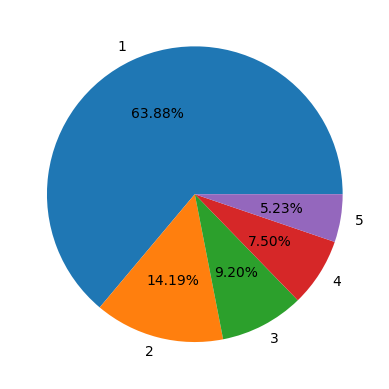

In [141]:
plt.pie(df1['Score'].value_counts(), labels=[1,2,3,4,5], autopct="%1.2f%%")
plt.show()

highly imbalanced dataset

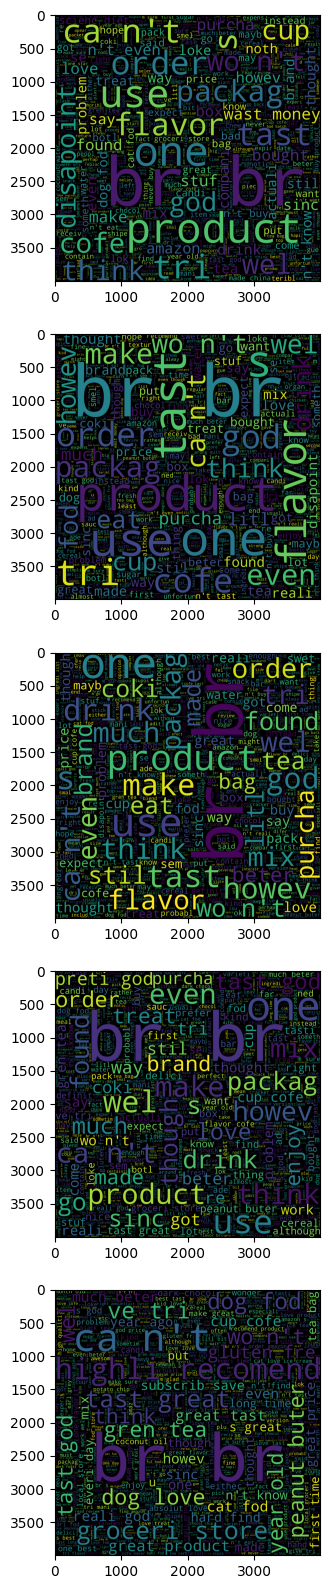

In [142]:
from wordcloud import WordCloud
plt.figure(figsize=(50,20))
for i in range(1,6):
    plt.subplot(5,1,i)
    wc = WordCloud(max_words=1000, width=4000, height=4000)
    wc.generate(' '.join(df1[df1['Score']==i]['Text']))
    plt.imshow(wc)
plt.show()

In [143]:
data1 = df1[df1['Score']==1]
data2 = df1[df1['Score']==2]
data3 = df1[df1['Score']==3]
data4 = df1[df1['Score']==4]
data5 = df1[df1['Score']==5]

In [144]:
new_df = pd.concat([data1[:29744], data2[:29744], data3[:29744], data4[:29744], data5[:29744]])
new_df.shape

(148720, 5)

In [145]:
new_df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
1,0,0,1,advertis,product ariv label jumbo salt peanut . peanut ...
12,1,1,1,cat fan new fod,cat hapili eat felida platinum two year got ne...
26,0,1,1,nasti flavor,candi red flavor plan chewi would never buy
50,0,7,1,n't like,oatmeal god mushi soft n't like quaker oat way go
62,2,2,1,stale product,ariv day stale could eat bag


In [146]:
from sklearn.utils import shuffle
shuffled_df = shuffle(new_df).reset_index(drop=True)

In [147]:
shuffled_df

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,0,0,1,read fine print,bought multi-pack come standard non-ed nylabon...
1,1,1,2,fine granul noth distinct,expect larger granual suger disapoint product ...
2,1,4,1,price high,warehous store cari le per even subscrib save ...
3,2,3,3,interest tast,read benefit pau d'arco tea decid give tri 's ...
4,0,0,4,gren tea litl bit extra,personali big fan tea drink tea ever sinc kid ...
...,...,...,...,...,...
148715,1,1,4,cheap efect,much say work torani botl preti wel god price ...
148716,2,3,3,dog like though perhap n't,live budget graduat student consid purina kind...
148717,1,1,5,great herbal tea cramp,mother-in-law recomend tea help naturali alevi...
148718,33,41,2,product properli describ,product receiv partli vanilin artifici vanila ...


In [148]:
shuffled_df.drop(['Summary', 'Text'], axis=1).corr()

,HelpfulnessNumerator,HelpfulnessDenominator,Score
HelpfulnessNumerator,1.000000,0.950917,-0.055500
HelpfulnessDenominator,0.950917,1.000000,-0.127735
Score,-0.055500,-0.127735,1.000000


there is multicolinearity so we'll remove one of them 

In [149]:
shuffled_df.drop('HelpfulnessNumerator', axis=1, inplace=True)

In [150]:
shuffled_df['Score'].value_counts()

Score
1    29744
2    29744
3    29744
4    29744
5    29744
Name: count, dtype: int64

In [182]:
X = shuffled_df['Text']
y = shuffled_df['Score']

In [190]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((118976,), (29744,), (118976,), (29744,))

In [192]:
x_train

133860    zero calori easili dispens chocol flavoring/sw...
108300    tast great although price wel ned le cent cup ...
106514    smel great lok great tast great guy like stron...
36103     sold medium roast cofe best n't flavor would p...
118232    love licoric one terific. 'm glad found line l...
                                ...                        
119879    fresher chestnut tast other tri peopl loke hea...
103694    'm sori say even non diet syrup use nutraswet ...
131932    sauc tast preti god 's creami spici overli nic...
146867    purchas calcium-magnesium suplement kid partic...
121958    god howev test wel hope everyon buy never take...
Name: Text, Length: 118976, dtype: object

In [193]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(x_train)

x_train = word_tokenizer.texts_to_sequences(x_train)
x_test = word_tokenizer.texts_to_sequences(x_test)

In [194]:
vocab_len = len(word_tokenizer.word_index) +1
vocab_len

43444

In [195]:
maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [196]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/kaggle/input/glove6b100dtxt/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [197]:
embedding_matrix = zeros((vocab_len, 100))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [160]:
from tensorflow.keras.layers import Flatten

In [198]:
y_train

133860    3
108300    3
106514    5
36103     2
118232    4
         ..
119879    5
103694    2
131932    4
146867    3
121958    1
Name: Score, Length: 118976, dtype: int64

In [199]:
y_train = y_train-1
y_test = y_test-1

In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [202]:
vocab_size = embedding_matrix.shape[0]

In [215]:
import numpy as np
print(np.bincount(y_train))

[23876 23755 23708 23751 23886]


In [226]:
lstm_model = Sequential([
    Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False),
    LSTM(128, return_sequences=True),  # First LSTM layer (captures sequential patterns)
    Dropout(0.3),  
    LSTM(64),  # Second LSTM layer
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # 5-class classification
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [227]:
lstm_model.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_33 (Embedding)             │ ?                           │       4,344,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_42 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_43 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,344,400 (16.57 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,344,400 (16.57 MB)

In [228]:
# Train model
history = lstm_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=32)

Epoch 1/15
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.2162 - loss: 1.6067 - val_accuracy: 0.2268 - val_loss: 1.6030
Epoch 2/15
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.2890 - loss: 1.5327 - val_accuracy: 0.4345 - val_loss: 1.3064
Epoch 3/15
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.4384 - loss: 1.2959 - val_accuracy: 0.4639 - val_loss: 1.2393
Epoch 4/15
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.4847 - loss: 1.2052 - val_accuracy: 0.4770 - val_loss: 1.2126
Epoch 5/15
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.5181 - loss: 1.1383 - val_accuracy: 0.5070 - val_loss: 1.1720
Epoch 6/15
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.5486 - loss: 1.0772 - val_accuracy: 0.5195 - val_loss: 1.1552
Epoch 7/15
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.5814 - loss: 1.0181 - val_accuracy: 0.4951 - val_loss: 1.1995
Epoch 8/15
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.5617 -

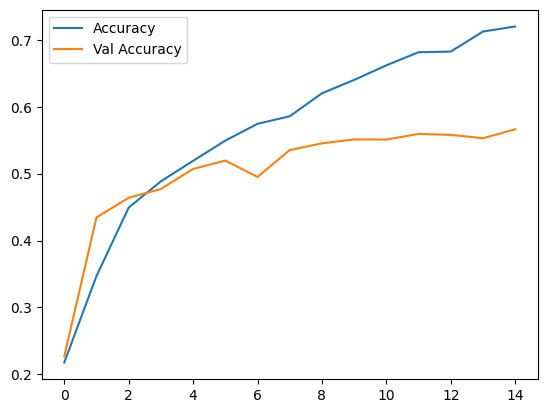

In [229]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()

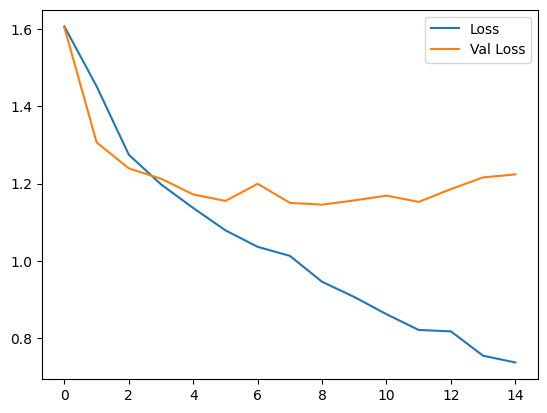

In [230]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()